Ref: guide note book 
https://github.com/Raph-09/Mall-Customer-Segmentation-Project-Using-Clustering-ALgorithms/blob/main/Mall_Customer_Segmentation_Project_Using_Clustering_Algorithms.ipynb

https://www.kaggle.com/karnikakapoor/customer-segmentation-clustering/data

https://www.kaggle.com/sathianpong/marketing-campaign-visualization-analysis

Ref: data 
https://www.kaggle.com/rodsaldanha/arketing-campaign


# **Clustering marketing campaign**

> Mini Project for SkillLane Advanced Python for Data Science.
 
 *by Thornthan yasukam*
 

---

**Abstact** 

I will be performing an unsupervised Learning that is k-means clustering technique on custumer's record from Rodolfo Saldanha. This mini project, I focus on divide customers into segments to optimize *who accept campagin"* and display on 3D(3 dimensional shapes). It also helps the business to concerns of different types of custumers.

---

**table of content**
*   1.import data
*   2.data cleaning
*   3.data exploration
*   4.data preprocessing
*   5.model implementation
*   6.conclusion




---


**Dataset** 
*    https://www.kaggle.com/rodsaldanha/arketing-campaign


















---



**1.IMPORTING LIBRARIES AND LOADING DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Pleum Love Data/Customers Clustering/marketing_campaign.csv", sep=";")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
#df.shape
print("Data shape: " + str(df.shape[0]) + " row " + str(df.shape[1]) + " Column")

Data shape: 2240 row 29 Column




---



**2.DATA CLEARNING**



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

*Missing Data*

In [7]:
check = df.isnull().sum()
print(check) 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


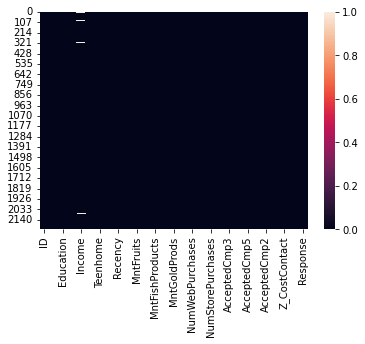

In [8]:
cols = df.columns
sns.heatmap(df[cols].isnull())

In [9]:
df = df.dropna()
print("total row after removing" , len(df))

total row after removing 2216


In [10]:
print("Data shape after remove missing and duplicate: " + str(df.shape[0]) + " row " + str(df.shape[1]) + " Column")

Data shape after remove missing and duplicate: 2216 row 29 Column


In [11]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
df = df.drop_duplicates()

**3.DATA EXPLORATION**

In [13]:
#copy dataframe for test exploration
data = df.copy()

In [14]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


*Focus on Categorical variables in the dataset column*

In [15]:
cate_vars = (data.dtypes == 'object')
object_cols = list(cate_vars[cate_vars].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Dt_Customer']


In [16]:
# count value
for col in object_cols:
    print("Total categories in the feature ",col  , data[col].value_counts(), "\n")

Total categories in the feature  Education Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 

Total categories in the feature  Marital_Status Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Total categories in the feature  Dt_Customer 2012-08-31    12
2012-09-12    11
2013-02-14    11
2014-05-12    11
2013-08-20    10
              ..
2012-10-19     1
2014-01-09     1
2014-04-27     1
2013-12-28     1
2012-12-08     1
Name: Dt_Customer, Length: 662, dtype: int64 



**3.DATA PREPROCESSING**

*Create new feature*

from data exploration, I should to change value in feature Qualitative only two point(0,1)
*   **Customer_member_time** : How long has the membership been since the lasted customer arrived?
*   Age
*   **Total_spent** :  total amount spent by the customer
*   **Relationship** : I will create two categories(Alone and lover)
*   **Children** : total amout kid and teen 
*   **Family_size** : total relation ship and children
*   **Is_parent** : Indicate father or mother measured by children
*   **Education** : I will create two categories(graduate and Undergraduate)









In [17]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [18]:
#สร้างคอลั่มที่เป็นระยะเวลาในการเป็นสมาชิกนับตั้งแต่ลูกค้าคนล่าสุดเข้ามา
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_member_time"] = days

In [19]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_member_time
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,663 days
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,113 days
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,312 days
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,139 days
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,161 days


In [20]:
#เปลี่ยนระยะเวลาให้เป็น numeric
data["Customer_member_time"] = pd.to_numeric(data["Customer_member_time"], errors="coerce")

In [21]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_member_time
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,57283200000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,9763200000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,26956800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,12009600000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,13910400000000000


In [22]:
#จัดการคำให้ดีขึ้นเพื่อให้เหลือแค่ 2 ค่าของตัวแปรเชิงคุณภาพเพื่อให้ง่ายต่อการคำนวน
#Feature Engineering

#Age of customer today 
data["Age"] = 2021-data["Year_Birth"]

#Total spendings on various items
data["Total_Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Relationship"] = data["Marital_Status"].replace({"Married":"Lover", 
                                                       "Together":"Lover", 
                                                       "Absurd":"Alone", 
                                                       "Widow":"Alone", 
                                                       "YOLO":"Alone", 
                                                       "Divorced":"Alone", 
                                                       "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
#Asume inlove is with 2 people
data["Family_Size"] = data["Relationship"].replace({"Alone": 1, "Lover":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate", 
                                             "Graduation":"graduate", 
                                             "Master":"graduate", 
                                             "PhD":"graduate"})

In [23]:
#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [24]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_member_time,Age,Total_Spent,Relationship,Children,Family_Size,Is_Parent
0,graduate,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57283200000000000,64,1617,Alone,0,1,0
1,graduate,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,9763200000000000,67,27,Alone,2,3,1
2,graduate,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,26956800000000000,56,776,Lover,0,2,0
3,graduate,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,12009600000000000,37,53,Lover,1,3,1
4,graduate,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,13910400000000000,40,422,Lover,1,3,1


In [25]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_member_time,Age,Total_Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,3.054423e+16,52.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.555200e+16,44.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.071520e+16,51.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.570560e+16,62.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.039360e+16,128.000000,2525.000000,3.000000,5.000000,1.000000


*3.2 outlier*

In [26]:
nummeric_vars = (data.dtypes != 'object')
numeric_cols = list(nummeric_vars[nummeric_vars].index)

print("Numeric variables in the dataset:", numeric_cols)

Numeric variables in the dataset: ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_member_time', 'Age', 'Total_Spent', 'Children', 'Family_Size', 'Is_Parent']


In [27]:
#from parplot check outlier 
def check_outlier_numeric(feature,dataset):
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(16,4)
    fig.suptitle(feature, fontsize=16)
    sns.histplot(data=dataset, x=feature, kde=True, ax=ax[0])
    sns.boxplot(data=dataset, x=feature, ax=ax[1])
    plt.show()

    print(dataset[feature].describe())

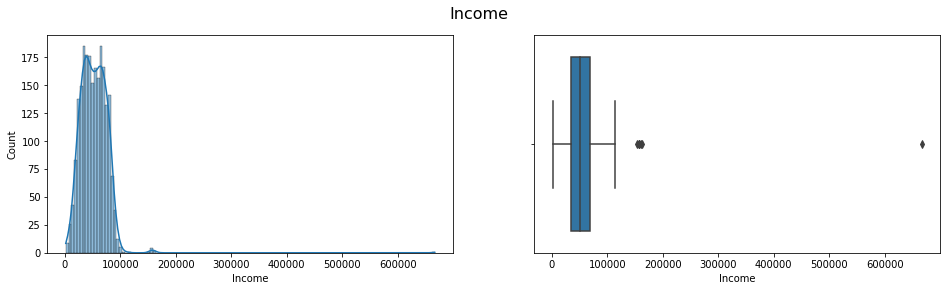

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


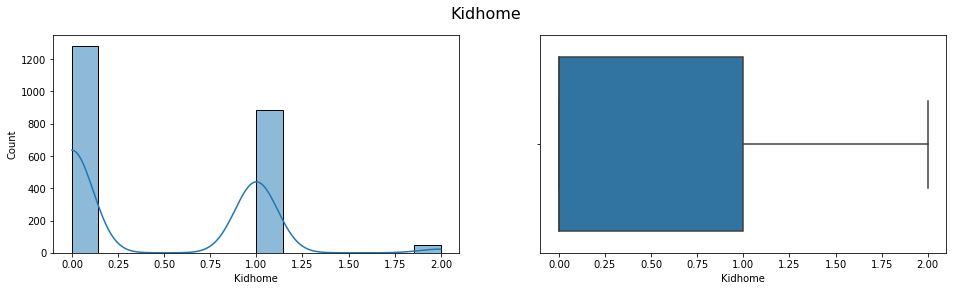

count    2216.000000
mean        0.441787
std         0.536896
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64


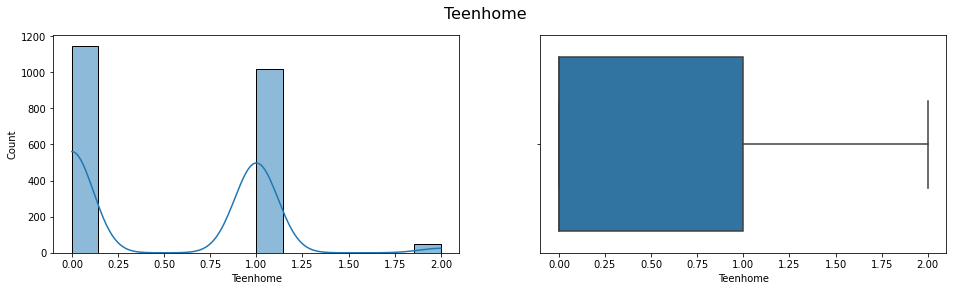

count    2216.000000
mean        0.505415
std         0.544181
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Teenhome, dtype: float64


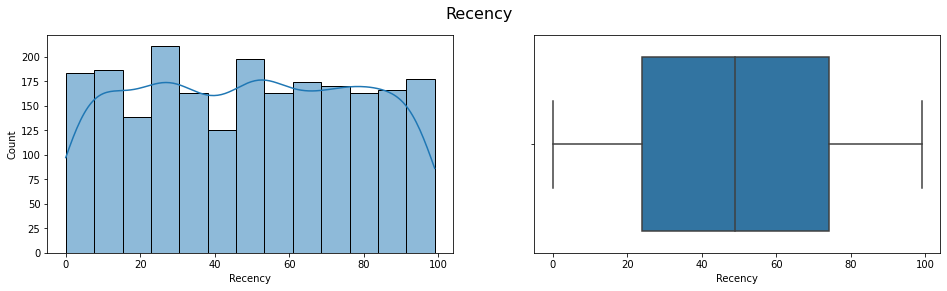

count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


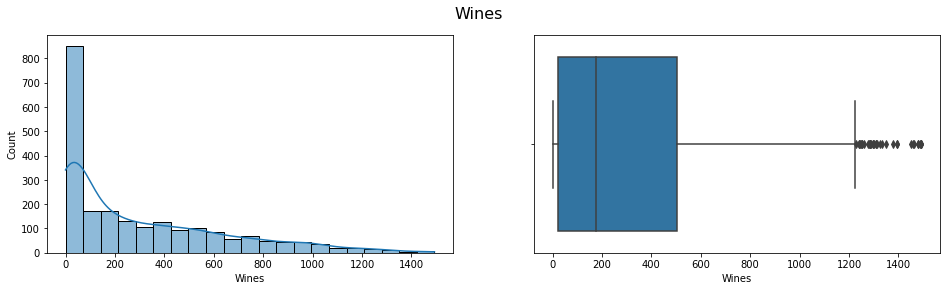

count    2216.000000
mean      305.091606
std       337.327920
min         0.000000
25%        24.000000
50%       174.500000
75%       505.000000
max      1493.000000
Name: Wines, dtype: float64


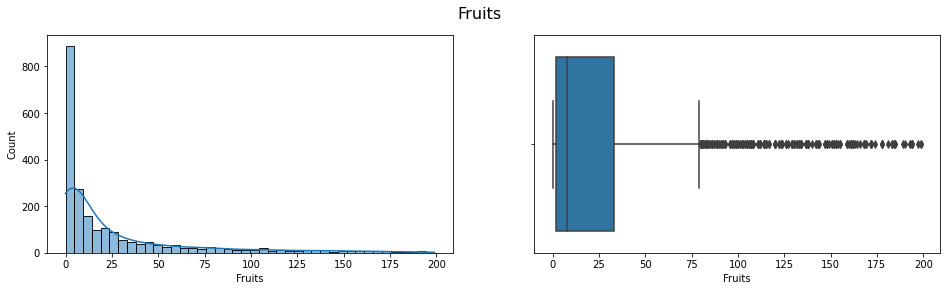

count    2216.000000
mean       26.356047
std        39.793917
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: Fruits, dtype: float64


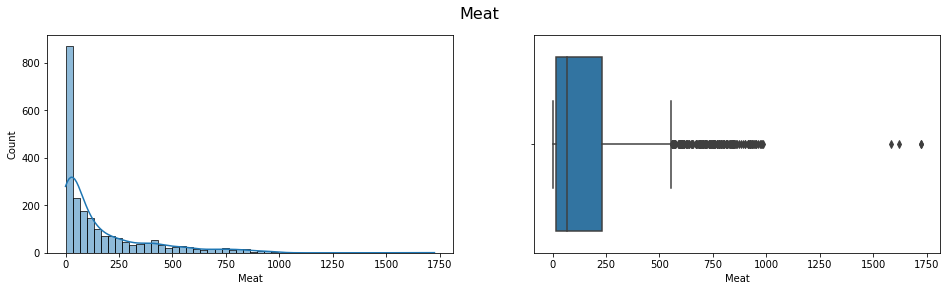

count    2216.000000
mean      166.995939
std       224.283273
min         0.000000
25%        16.000000
50%        68.000000
75%       232.250000
max      1725.000000
Name: Meat, dtype: float64


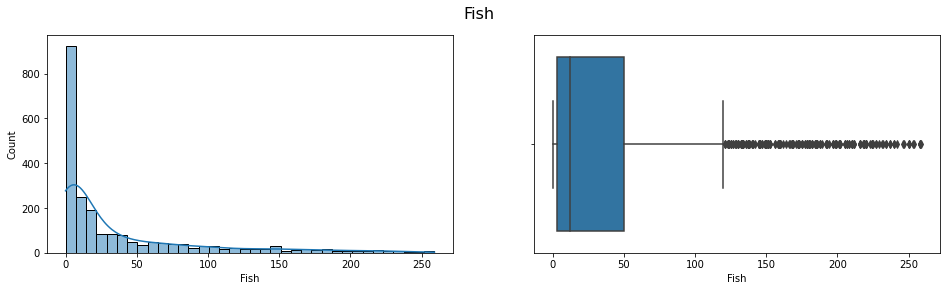

count    2216.000000
mean       37.637635
std        54.752082
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: Fish, dtype: float64


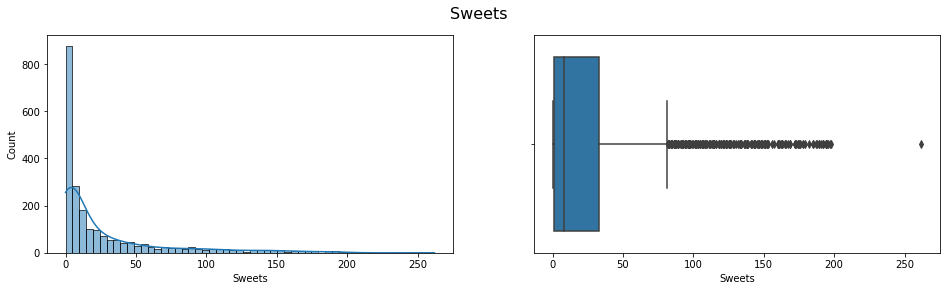

count    2216.000000
mean       27.028881
std        41.072046
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       262.000000
Name: Sweets, dtype: float64


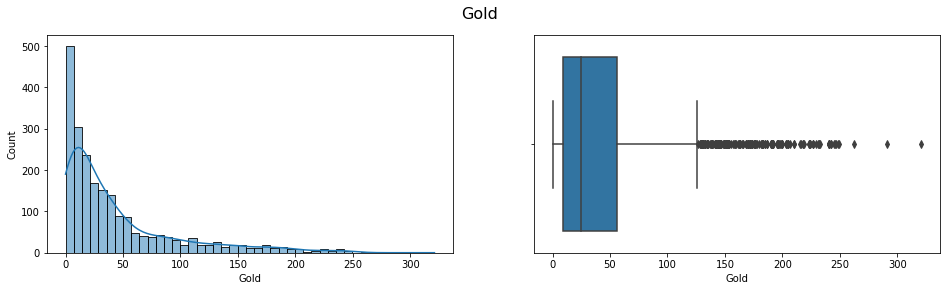

count    2216.000000
mean       43.965253
std        51.815414
min         0.000000
25%         9.000000
50%        24.500000
75%        56.000000
max       321.000000
Name: Gold, dtype: float64


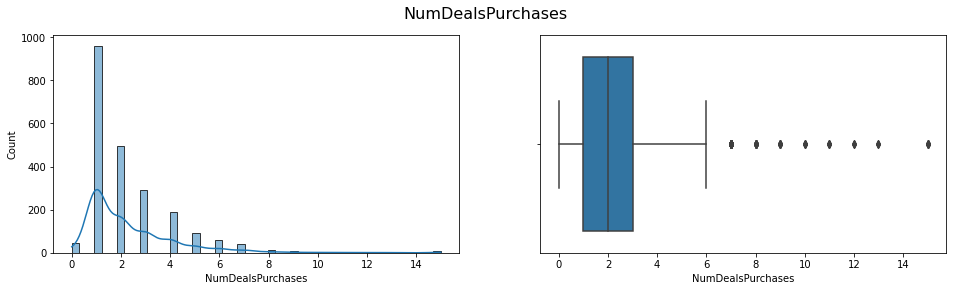

count    2216.000000
mean        2.323556
std         1.923716
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64


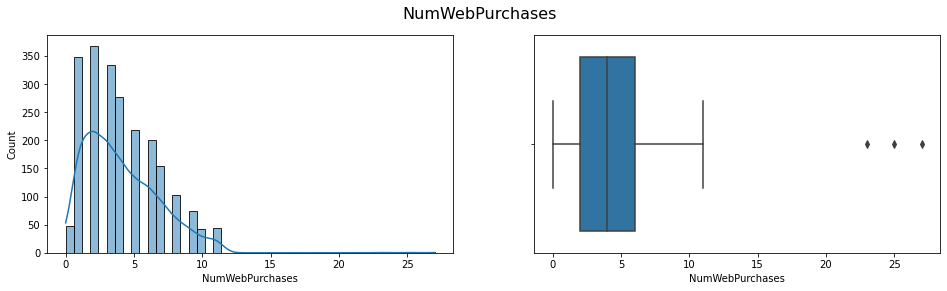

count    2216.000000
mean        4.085289
std         2.740951
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64


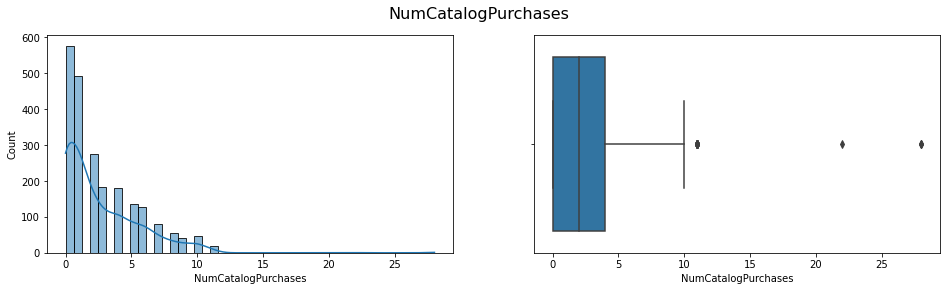

count    2216.000000
mean        2.671029
std         2.926734
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


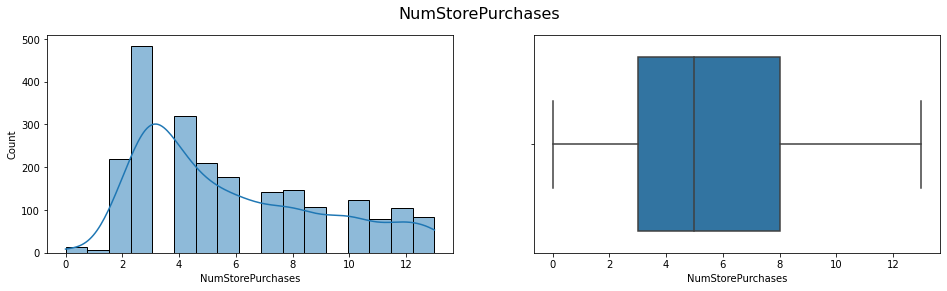

count    2216.000000
mean        5.800993
std         3.250785
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


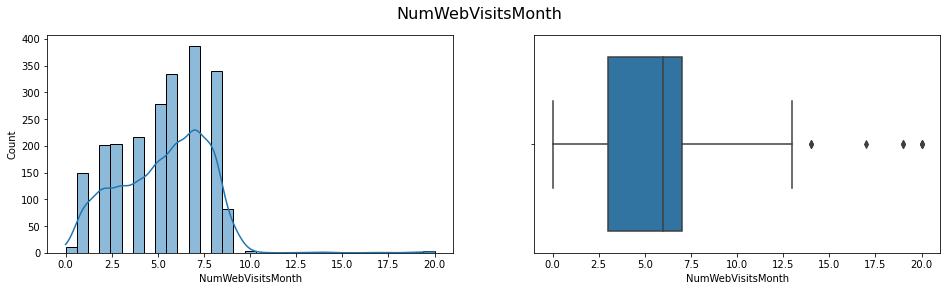

count    2216.000000
mean        5.319043
std         2.425359
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64


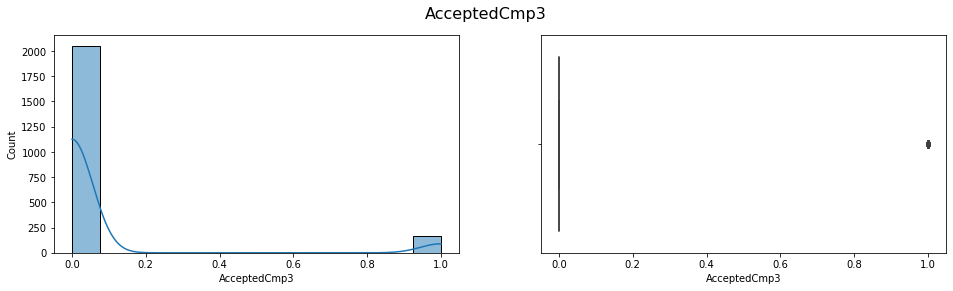

count    2216.000000
mean        0.073556
std         0.261106
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp3, dtype: float64


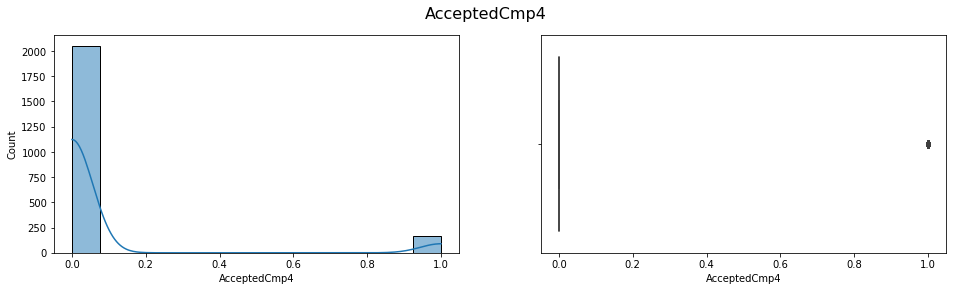

count    2216.000000
mean        0.074007
std         0.261842
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp4, dtype: float64


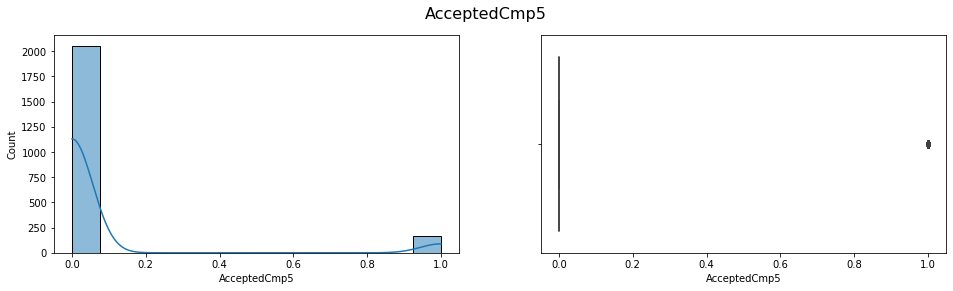

count    2216.000000
mean        0.073105
std         0.260367
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp5, dtype: float64


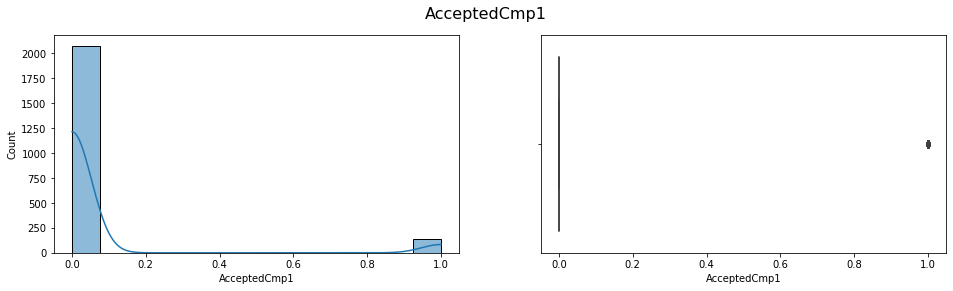

count    2216.000000
mean        0.064079
std         0.244950
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp1, dtype: float64


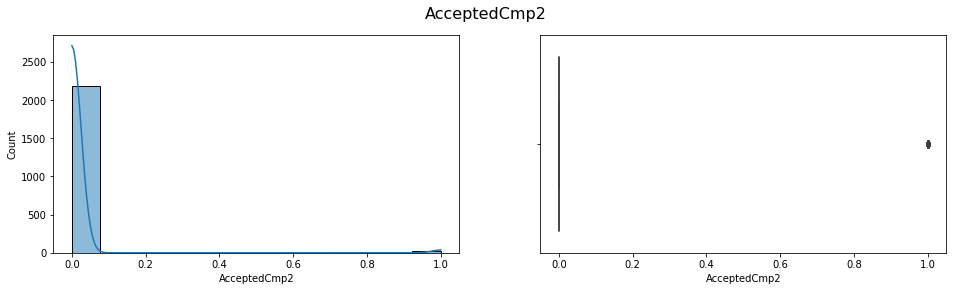

count    2216.000000
mean        0.013538
std         0.115588
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: AcceptedCmp2, dtype: float64


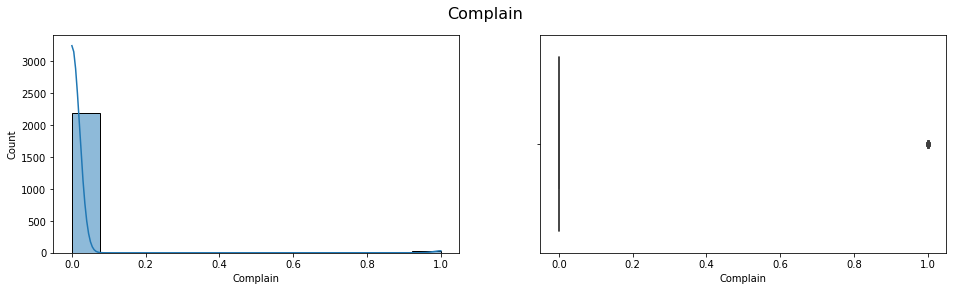

count    2216.000000
mean        0.009477
std         0.096907
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Complain, dtype: float64


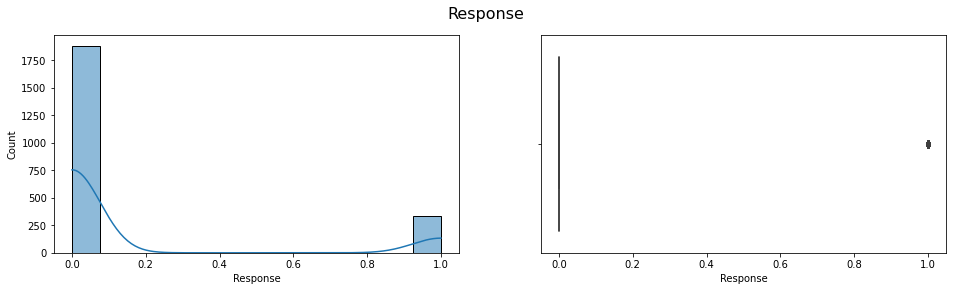

count    2216.000000
mean        0.150271
std         0.357417
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64


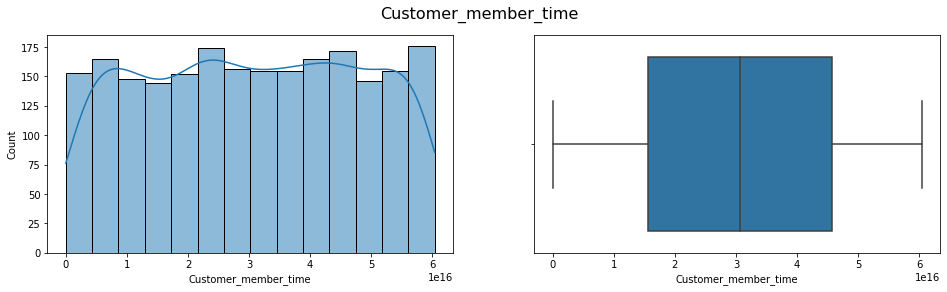

count    2.216000e+03
mean     3.054423e+16
std      1.749036e+16
min      0.000000e+00
25%      1.555200e+16
50%      3.071520e+16
75%      4.570560e+16
max      6.039360e+16
Name: Customer_member_time, dtype: float64


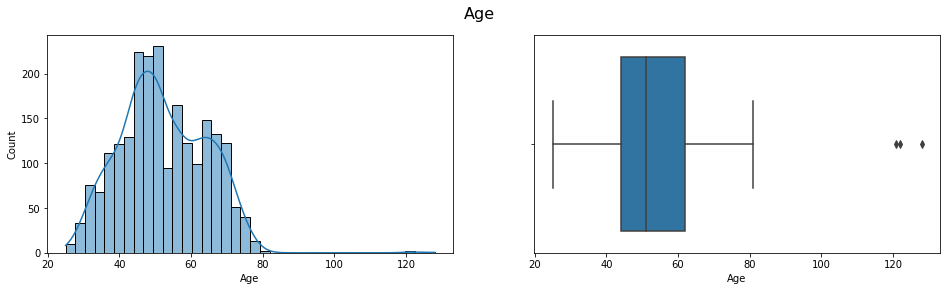

count    2216.000000
mean       52.179603
std        11.985554
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64


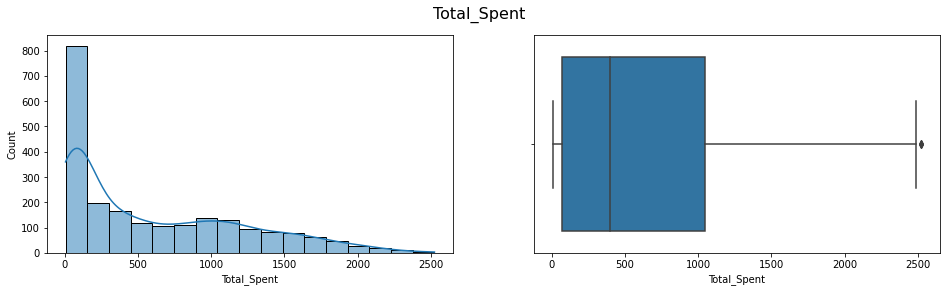

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Total_Spent, dtype: float64


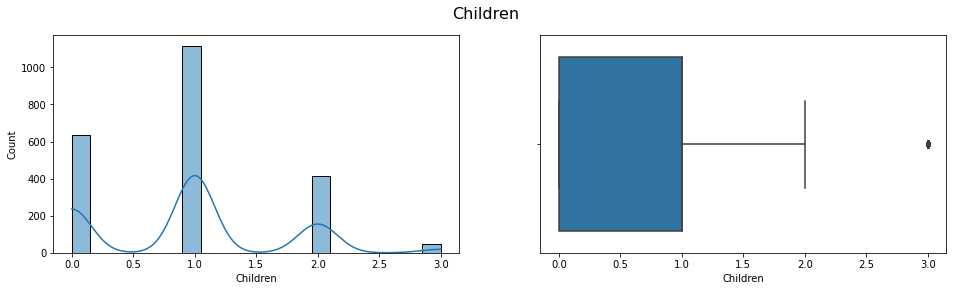

count    2216.000000
mean        0.947202
std         0.749062
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Children, dtype: float64


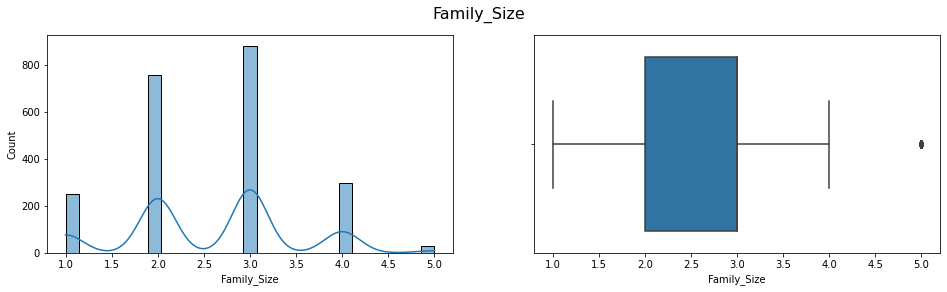

count    2216.000000
mean        2.592509
std         0.905722
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: Family_Size, dtype: float64


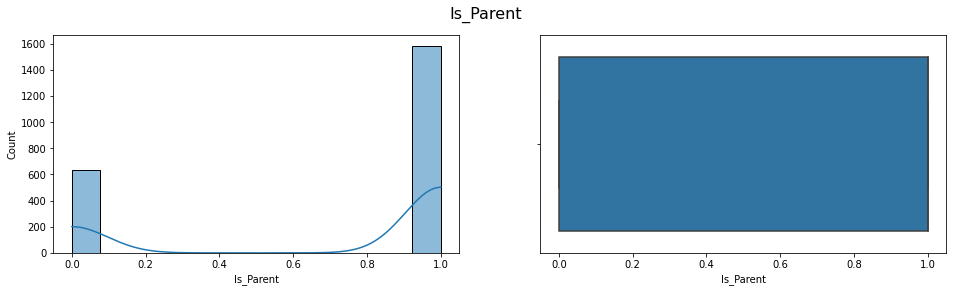

count    2216.000000
mean        0.714350
std         0.451825
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Is_Parent, dtype: float64


In [28]:
for item in numeric_cols:
    check_outlier_numeric(feature=item, dataset=data)

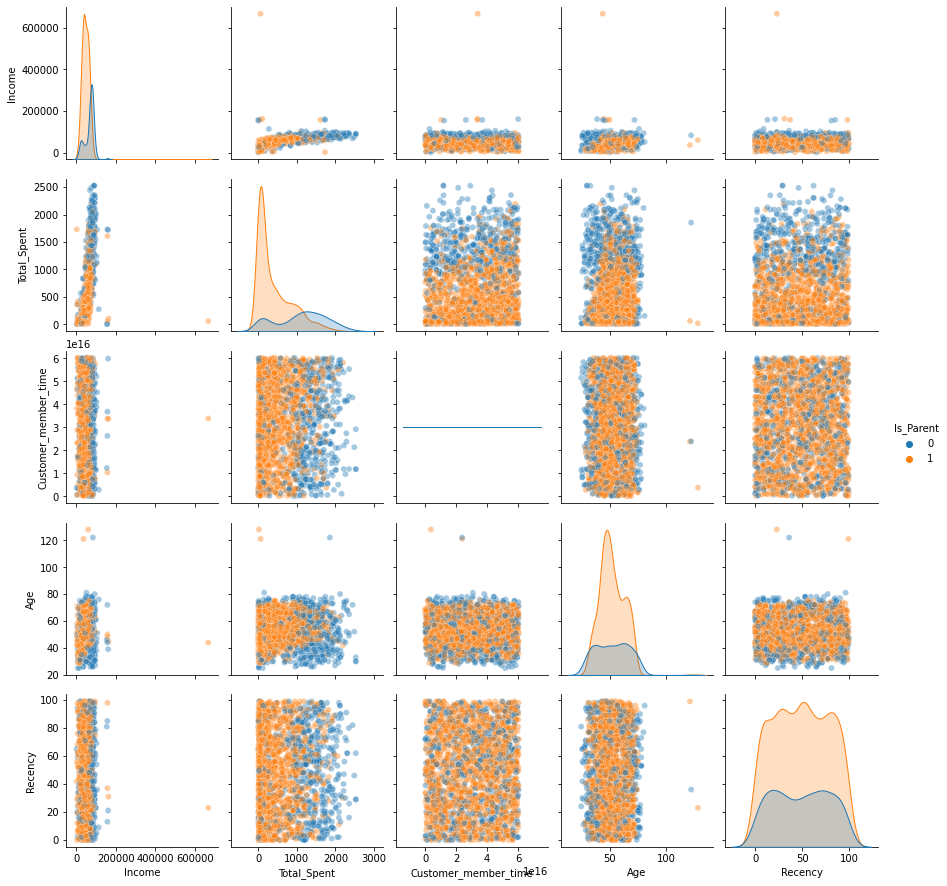

In [29]:
# pairplot เฉพาะคอลั่มที่อาจจะส่งผลต่อการขาย และจัดกลุ่มตามสถานะครอบครัว
sns.pairplot(data, vars=["Income","Total_Spent","Customer_member_time","Age","Recency"],
             hue='Is_Parent',
             plot_kws={'alpha': .4});

In [30]:
#Dropping the outliers.
data = data[(data["Income"]<600000)]
data = data[(data["Total_Spent"]<2500)]
data = data[(data["Age"]<90)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2209


Show the correlation amongst the features after remove outlier. 

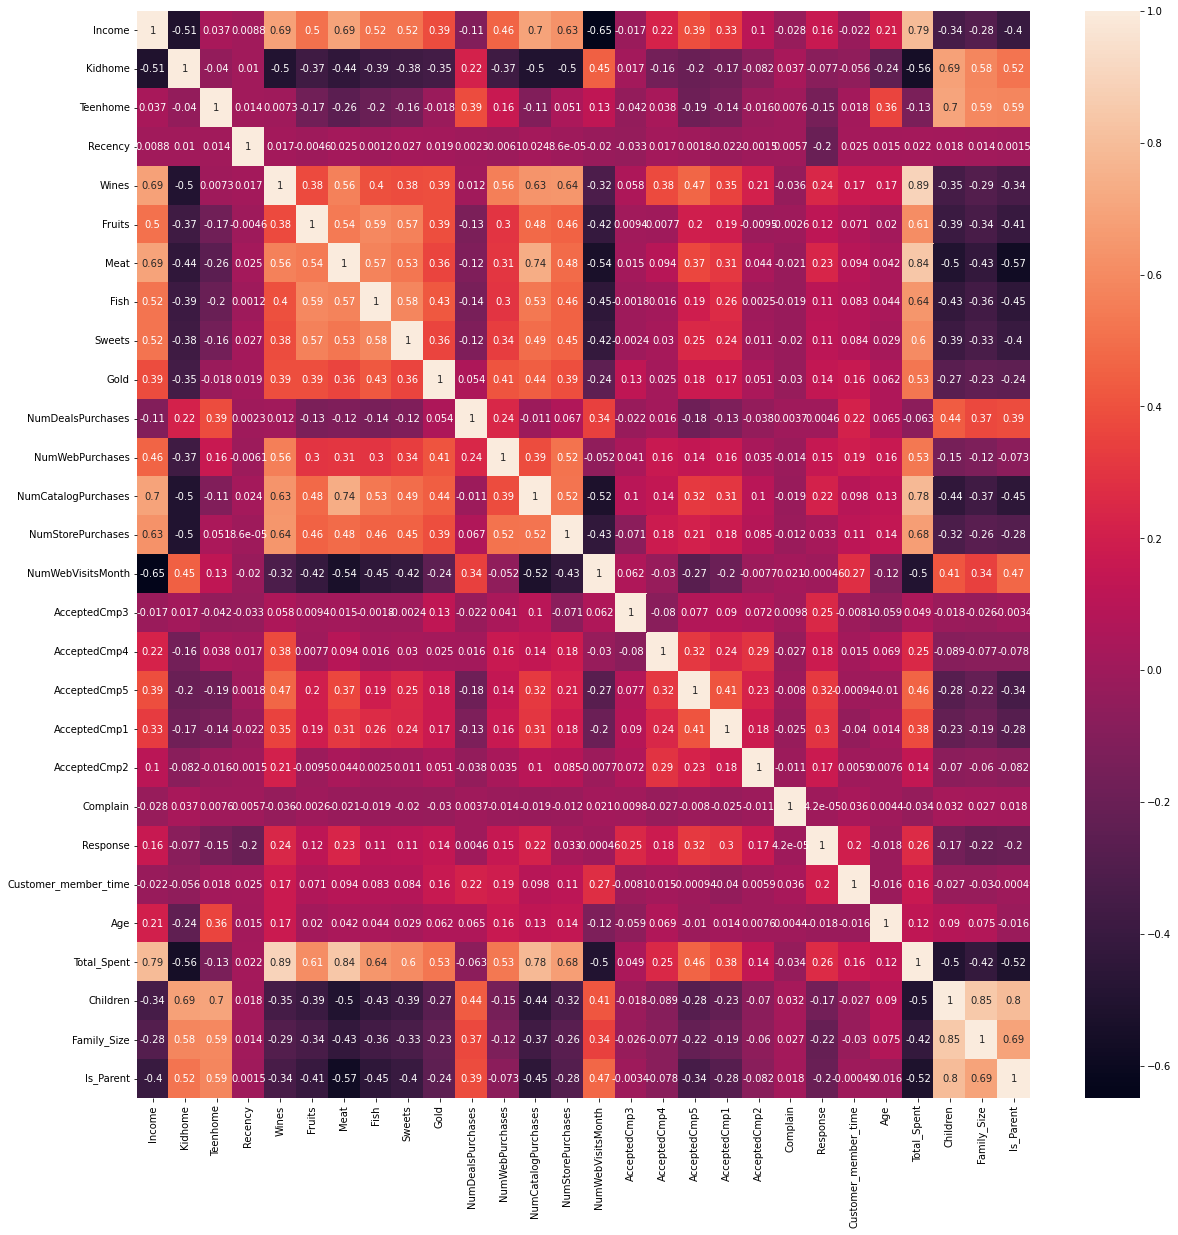

In [31]:
#correlation matrix.
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True)

**4.DATA PREPROCESSING**

*Change object to numeric*

In [32]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Relationship']


*Scaling the features using the standard scaler*

In [33]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [34]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [35]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_member_time,Age,Total_Spent,Relationship,Children,Family_Size,Is_Parent
0,0.358843,0.289892,-0.823691,-0.930876,0.309801,0.985190,1.563492,1.705330,2.455059,1.495056,0.853213,0.349970,1.426483,2.508438,-0.554313,0.690892,1.526476,1.017472,1.691103,-1.350855,-1.266833,-1.761691,-1.584905
1,0.358843,-0.258869,1.038677,0.906752,-0.381078,-0.872567,-0.636786,-0.718412,-0.649625,-0.633257,-0.732673,-0.169576,-1.125902,-0.570353,-1.169938,-0.134517,-1.189840,1.274301,-0.964986,-1.350855,1.403428,0.447549,0.630953
2,0.358843,0.916868,-0.823691,-0.930876,-0.795605,0.362961,0.577161,-0.175314,1.341026,-0.143989,-0.036430,-0.689121,1.426483,-0.228265,1.292561,-0.547221,-0.207028,0.332595,0.286216,0.740272,-1.266833,-0.657071,-1.584905
3,0.358843,-1.175393,1.038677,-0.930876,-0.795605,-0.872567,-0.560915,-0.655574,-0.503522,-0.584330,-0.752013,-0.169576,-0.761275,-0.912441,-0.554313,0.278188,-1.061432,-1.293989,-0.921553,0.740272,0.068298,0.447549,0.630953
4,0.358843,0.297104,1.038677,-0.930876,1.553383,-0.390265,0.425417,-0.215710,0.153940,0.002791,-0.558612,1.389062,0.332604,0.113823,0.061312,-0.134517,-0.952780,-1.037160,-0.305140,0.740272,0.068298,0.447549,0.630953


*PCA (การวิเคราะห์องค์ประกอบหลัก)*

**Principle Component Analysis is dimensionality reduction technical.**


*Dimensionality reduction  idea*
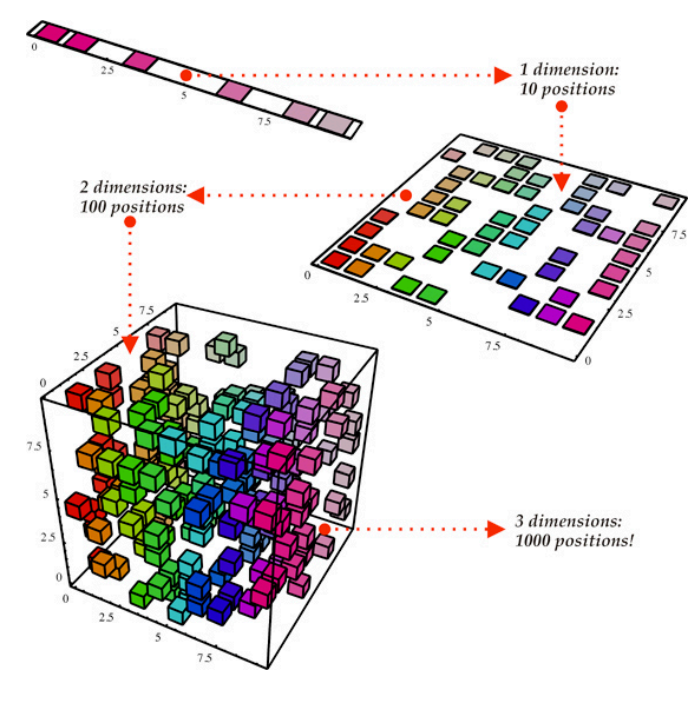

PCA use to find relatoinal of variables with reduct dimention by all of feature in this data

**benefit**
- small feature 
- high performance
- low space complexity 




Ref:

      https://lengyi.medium.com/principal-components-analysis-pca-e97c976ff130

      https://www.gotoknow.org/posts/566063

In [36]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2","col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2209.0,-2.311918e-17,2.875448,-5.946445,-2.544644,-0.774349,2.404680,7.508799
col2,2209.0,-6.764872e-17,1.718553,-4.373361,-1.322921,-0.182666,1.252146,6.213494
col3,2209.0,-2.009107e-17,1.242940,-3.580940,-0.832604,-0.035864,0.844484,6.398634


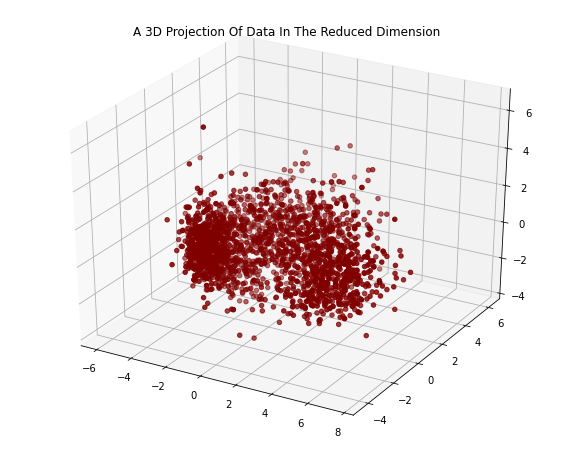

In [37]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [38]:
PCA_ds

,col1,col2,col3
0,4.996302,-0.215421,2.312058
1,-2.883487,0.063838,-1.741929
2,2.613035,-0.743679,-0.322559
3,-2.674346,-1.443274,-0.366401
4,-0.625687,0.240258,-0.032443
...,...,...,...
2204,2.329006,2.381401,0.671811
2205,-3.056134,4.103431,-1.327802
2206,2.658843,-1.875994,0.239584
2207,1.531600,1.727219,-1.761983


------------------------------------------

**5. MODEL IMPLEMENTATION KMEAN**

*find the beat number of cluster*

In [39]:
#K-mean find num of cluster
avgs = []
min_k = 2
x = np.array(list(zip(PCA_ds['col1'],PCA_ds['col2'],PCA_ds['col3'])))

for k in range(min_k,10):
  km = KMeans(n_clusters=k).fit(x)
  s = metrics.silhouette_score(x , km.labels_)
  print("Silhouette Coefficients of k =", k ,"is", s)
avgs.append(s)

suitableK = avgs.index(max(avgs)) + min_k
print("Optimal K is ", suitableK)

Silhouette Coefficients of k = 2 is 0.44280172840213344
Silhouette Coefficients of k = 3 is 0.4081862000759132
Silhouette Coefficients of k = 4 is 0.37336304242508817
Silhouette Coefficients of k = 5 is 0.34796670281471453
Silhouette Coefficients of k = 6 is 0.34748789706002586
Silhouette Coefficients of k = 7 is 0.3512105205093895
Silhouette Coefficients of k = 8 is 0.30831781416384096
Silhouette Coefficients of k = 9 is 0.2820931041539525
Optimal K is  2


In [40]:
model=KMeans(n_clusters=suitableK)
model

KMeans(n_clusters=2)

In [41]:
x = PCA_ds[['col1','col2','col3']]
model.fit(x)

KMeans(n_clusters=2)

In [42]:
x = np.array(list(zip(PCA_ds['col1'],PCA_ds['col2'],PCA_ds['col3'])))
labels = model.predict(x)
centroids = model.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


*Centroids after clustering*

In [43]:
centroids

array([[-2.00782948, -0.12623425,  0.01041549],
       [ 3.18572476,  0.20028971, -0.01652576]])

In [44]:
model.labels_

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

*Include result to PCA_ds : for ploting 3D
and result to dataset* 

In [45]:
PCA_ds['cluster'] = model.labels_
data['cluster'] = model.labels_

In [46]:
PCA_ds

,col1,col2,col3,cluster
0,4.996302,-0.215421,2.312058,1
1,-2.883487,0.063838,-1.741929,0
2,2.613035,-0.743679,-0.322559,1
3,-2.674346,-1.443274,-0.366401,0
4,-0.625687,0.240258,-0.032443,0
...,...,...,...,...
2204,2.329006,2.381401,0.671811,1
2205,-3.056134,4.103431,-1.327802,0
2206,2.658843,-1.875994,0.239584,1
2207,1.531600,1.727219,-1.761983,1


In [47]:
data

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_member_time,Age,Total_Spent,Relationship,Children,Family_Size,Is_Parent,cluster
0,1,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57283200000000000,64,1617,0,0,1,0,1
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,9763200000000000,67,27,0,2,3,1,0
2,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,26956800000000000,56,776,1,0,2,0,1
3,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,12009600000000000,37,53,1,1,3,1,0
4,1,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,13910400000000000,40,422,1,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,32918400000000000,54,1341,1,1,3,1,1
2236,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1641600000000000,75,444,1,3,5,1,0
2237,1,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,13392000000000000,40,1241,0,0,1,0,1
2238,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,13478400000000000,65,843,1,1,3,1,1


**6.Conclusion**

*Visualize results*

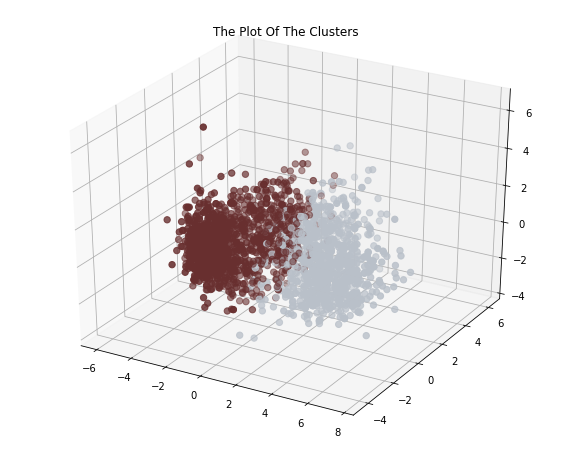

[[-2.00782948 -0.12623425  0.01041549]
 [ 3.18572476  0.20028971 -0.01652576]]


In [48]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

cmap = colors.ListedColormap(["#682F2F","#B9C0C9"])

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["cluster"], marker='o', cmap = cmap )
# ax.scatter(centroids[0][0], centroids[0][1],centroids[0][2], marker='*', s = 100, c = 'yellow')
ax.set_title("The Plot Of The Clusters")
plt.show()
print(centroids)

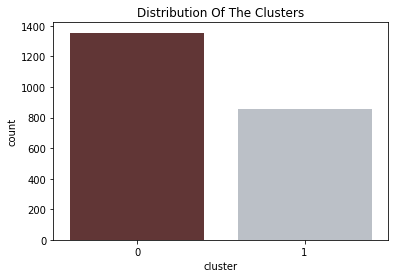

In [49]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

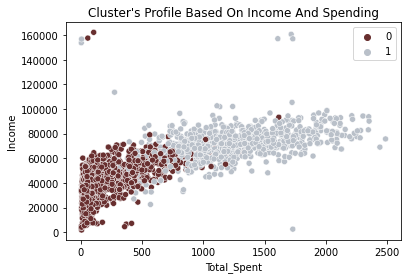

In [50]:
pal = ["#682F2F","#B9C0C9"]
pl = sns.scatterplot(data = data,x=data["Total_Spent"], y=data["Income"],hue=data["cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

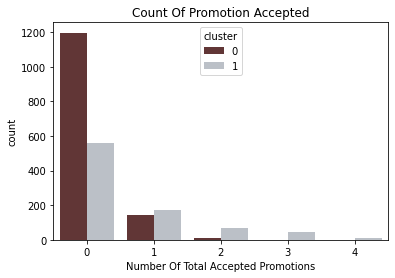

In [51]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["cluster"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()